# ID Block

- Author: Eric Zair
- File: linear_regression.py
- Date 02/11/2020

## Program Description

Using built in functions for this program I will create a linera regression model that will map the price of a given car to the expected value by only using mileage as a value. In otherwords, I will find the relation of milage to the price of a used car.

In [17]:
import turicreate

from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
used_car_sales = turicreate.SFrame('../data/usedCar.csv')

Finished parsing file /home/ez/Workspace/Classes/Machine Learning/Assignment1/data/usedCar.csv

Parsing completed. Parsed 100 lines in 0.177654 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,int,str,int,str,str,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ez/Workspace/Classes/Machine Learning/Assignment1/data/usedCar.csv

Parsing completed. Parsed 17506 lines in 0.076478 secs.

## Scatter Points Representing Mileage

### X = Mileage, Y = Total Cost of Car

We want to fit a line for the below scatter points.


In [33]:
turicreate.show(used_car_sales[:5000]['mileage'], used_car_sales[:5000]['total.cost'])

Materializing X axis SArray

Materializing Y axis SArray

In [34]:
used_car_sales.show()

Materializing SFrame

## Split The Training & Test Data

### 80% Training Data, 20% Testing Data

In [35]:
training_data, test_data, = used_car_sales.random_split(.8, seed=0)

## Now, let's generate our model (using the built in turicreate methods).


In [43]:
mileage_model = turicreate.linear_regression.create(training_data, target='total.cost', features=['mileage'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 13360

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

## Mean total cost of test data

In [37]:

print(test_data['total.cost'].mean())

4889.492446252181


## Our RMSE & Maximum error after

In [38]:
print(mileage_model.evaluate(test_data))

{'rmse': 918.1485759586454, 'max_error': 3909.2240664635765}


## Coefficients

In [39]:
print(mileage_model.coefficients)

+-------------+-------+-----------------------+------------------------+
|     name    | index |         value         |         stderr         |
+-------------+-------+-----------------------+------------------------+
| (intercept) |  None |   5422.483597180008   |   37.42248389339785    |
|   mileage   |  None | -0.006819126439369156 | 0.00047450801921846526 |
+-------------+-------+-----------------------+------------------------+
[2 rows x 4 columns]



## Linear Line After Evaluating

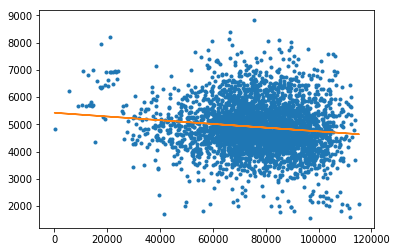

In [40]:
# Create a line graph of our prediction on our test data, to see our results.
plt.plot(test_data['mileage'], test_data['total.cost'], '.',
         test_data['mileage'], mileage_model.predict(test_data), '-')

## I just like subarus, so I was messing around

In [41]:
# I like subarus, so i wanted to see what would result from doing the following:
subarus = used_car_sales[used_car_sales['make.model']=='SUBARU.IMPREZA']
                         
subarus.show()

Materializing SFrame

In [42]:
# I wonder what the predictions for subaru impreza's looks like. :)
print("For subaru imprezas:", mileage_model.predict(subarus))

For subaru imprezas: [4810.194234189051]
